# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [211]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import openweathermapy.core as owm

# Import API key
api_key = "67fd437563c3bb1de65da14c3a31e35f"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [212]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [213]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
#print(query_url)

#print(maxtemp)

In [216]:
maxtemp = []
idlist= []
namecoun = []
cloudiness = []
country= []
date= []
humidity = []
lat = []
lon = []
wind =[]

for citycity in cities:
    try:
        response = requests.get(query_url + citycity).json()
        maxtemp.append(response['main']['temp_max'])
        idlist.append(response['id'])
        namecoun.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        
    except(KeyError, IndexError):
        pass
    
print(namecoun)
print(cloudiness)
print(country)
print(date)
print(humidity)
print(lat)
print(lon)
print(maxtemp)
print(wind)

['New Norfolk', 'Arraial do Cabo', 'Saint-Philippe', 'Saint George', 'Vostok', 'Karasjok', 'Tsukumi', 'Bam', 'Rikitea', 'Krasnogvardeyets', 'Punta Arenas', 'Shimanovsk', 'Kahului', 'Quarai', 'Kodiak', 'Tuktoyaktuk', 'Ushuaia', 'Parabel', 'Bluff', 'Busselton', 'Kijang', 'Talnakh', 'Sakaiminato', 'Hofn', 'Porbandar', 'Torbay', 'Fukue', 'Abu Samrah', 'Tautira', 'San Patricio', 'Tasiilaq', 'Grand Gaube', 'Kiunga', 'Sur', 'Khatanga', 'Albany', 'Provideniya', 'Bom Jardim', 'Ahipara', 'Te Anau', 'Castro', 'Belaya Gora', 'Mehamn', 'Butaritari', 'Vardo', 'Umm Lajj', 'Misratah', 'Kapaa', 'Nanortalik', 'Hilo', 'Ribeira Grande', 'Cape Town', 'Cabra', 'Victoria', 'Mahebourg', 'Emba', 'Peruibe', 'Cockburn Town', 'Kaeo', 'Aksu', 'Mataura', 'Tramore', 'Soyo', 'Hermanus', 'Kavieng', 'Saint-Pierre', 'Homer', 'Aquiraz', 'Chokurdakh', 'Qaanaaq', 'Yarmouth', 'Gamba', 'Juchipila', 'Saquarema', 'Avera', 'Qaqortoq', 'Barrow', 'Padang', 'Panguna', 'Bredasdorp', 'Mayo', 'Hobart', 'Georgetown', 'Leh', 'Port Alfr

In [217]:
dataframe = pd.DataFrame({'City': namecoun, 'Country':country, 'Cloudiness': cloudiness,
                        'Date':date, 'Humidity':humidity, 'Latitude':lat, 'Longitude': lon, 
                          'Max Temp': maxtemp, 'Wind Speed': wind})

dataframe.head()

,City,Country,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,New Norfolk,AU,40,1538780400,54,-42.78,147.06,14.00,3.10
1,Arraial do Cabo,BR,88,1538781564,100,-22.97,-42.02,20.27,4.57
2,Saint-Philippe,CA,75,1538780400,65,45.36,-73.48,9.00,3.60
3,Saint George,GR,20,1538779800,87,39.45,22.34,13.00,2.60
4,Vostok,RU,48,1538781564,77,46.45,135.83,12.22,1.27


Text(0,0.5,'Max Temperature (F)')

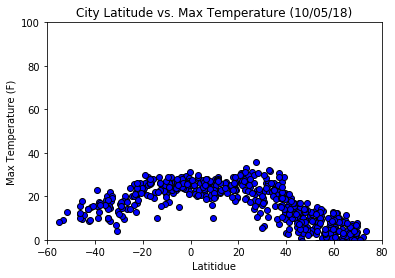

In [218]:
#Lat vs max temp plot
plt.xlim(-60,80)
plt.ylim(0, 100)

plt.scatter(lat, maxtemp, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Max Temperature (10/05/18)")
plt.xlabel("Latitidue")
plt.ylabel("Max Temperature (F)")

Text(0,0.5,'Humidity(%)')

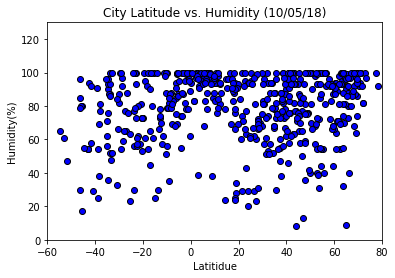

In [219]:
#Lat vs humidity plot
plt.xlim(-60,80)
plt.ylim(0, 130)

plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Humidity (10/05/18)")
plt.xlabel("Latitidue")
plt.ylabel("Humidity(%)")

Text(0,0.5,'Cloudiness(%)')

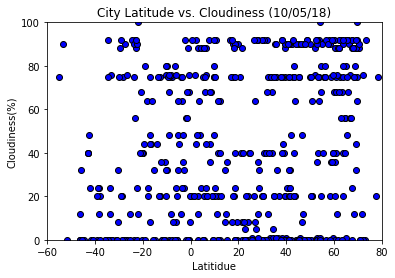

In [220]:
plt.xlim(-60,80)
plt.ylim(0, 100)

plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Cloudiness (10/05/18)")
plt.xlabel("Latitidue")
plt.ylabel("Cloudiness(%)")

Text(0,0.5,'Wind Speed(mph)')

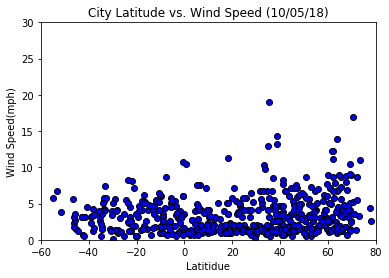

In [222]:
plt.xlim(-60,80)
plt.ylim(0, 30)

plt.scatter(lat, wind, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Wind Speed (10/05/18)")
plt.xlabel("Latitidue")
plt.ylabel("Wind Speed(mph)")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

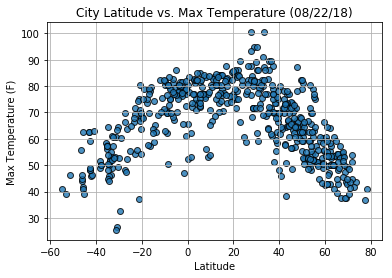

#### Latitude vs. Humidity Plot

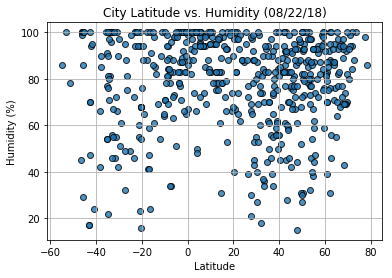

#### Latitude vs. Cloudiness Plot

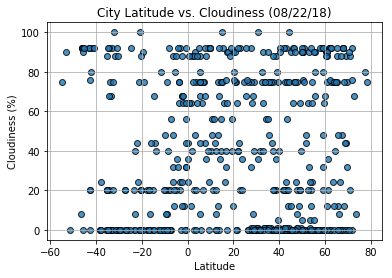

#### Latitude vs. Wind Speed Plot

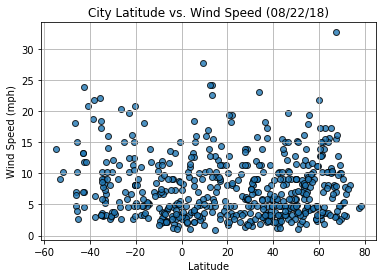